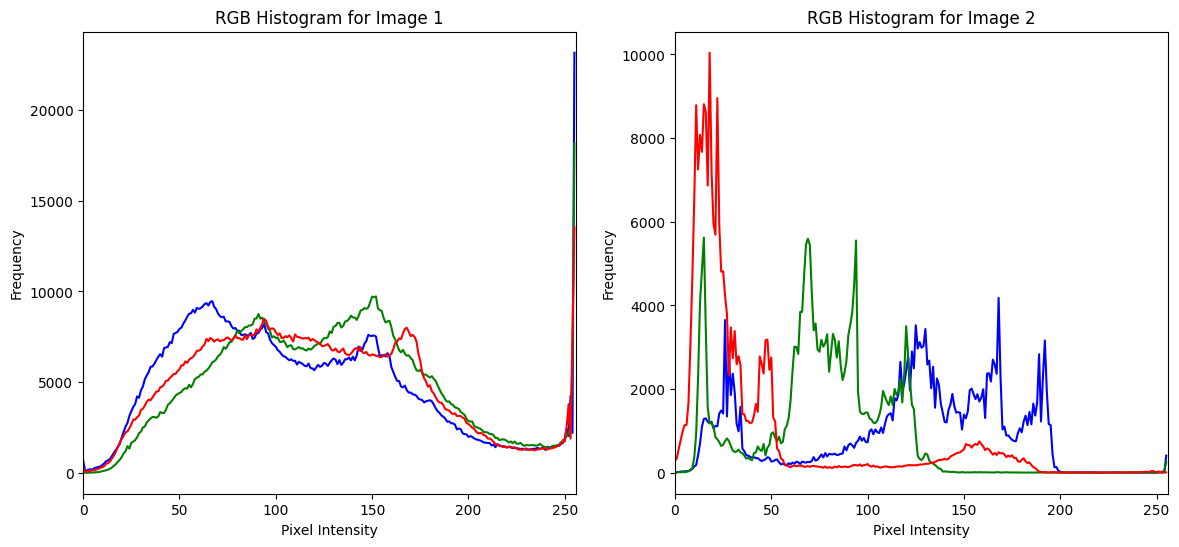

Correlation between Image 1 and Image 2 (Red Channel): -0.34026778169544425
Correlation between Image 1 and Image 2 (Green Channel): 0.26030130217164077
Correlation between Image 1 and Image 2 (Blue Channel): 0.20210246303964524


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_rgb_histogram(image, ax, title):
    colors = ('b', 'g', 'r')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(hist, color=color)
        ax.set_xlim([0, 256])
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

def compare_histograms(hist1, hist2):
    # Comparing the histograms using correlation method
    correlation = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    return correlation

# Load two images
image1 = cv2.imread('/content/img1.jpg')
image2 = cv2.imread('/content/img2.jpg')

# Calculate RGB histograms for both images
hist1_r = cv2.calcHist([image1], [2], None, [256], [0, 256])
hist1_g = cv2.calcHist([image1], [1], None, [256], [0, 256])
hist1_b = cv2.calcHist([image1], [0], None, [256], [0, 256])

hist2_r = cv2.calcHist([image2], [2], None, [256], [0, 256])
hist2_g = cv2.calcHist([image2], [1], None, [256], [0, 256])
hist2_b = cv2.calcHist([image2], [0], None, [256], [0, 256])

# Normalize the histograms
hist1_r = cv2.normalize(hist1_r, hist1_r).flatten()
hist1_g = cv2.normalize(hist1_g, hist1_g).flatten()
hist1_b = cv2.normalize(hist1_b, hist1_b).flatten()

hist2_r = cv2.normalize(hist2_r, hist2_r).flatten()
hist2_g = cv2.normalize(hist2_g, hist2_g).flatten()
hist2_b = cv2.normalize(hist2_b, hist2_b).flatten()

# Plot the histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_rgb_histogram(image1, axes[0], "RGB Histogram for Image 1")
plot_rgb_histogram(image2, axes[1], "RGB Histogram for Image 2")
plt.show()

# Compare histograms
correlation_r = compare_histograms(hist1_r, hist2_r)
correlation_g = compare_histograms(hist1_g, hist2_g)
correlation_b = compare_histograms(hist1_b, hist2_b)

print(f"Correlation between Image 1 and Image 2 (Red Channel): {correlation_r}")
print(f"Correlation between Image 1 and Image 2 (Green Channel): {correlation_g}")
print(f"Correlation between Image 1 and Image 2 (Blue Channel): {correlation_b}")


img1

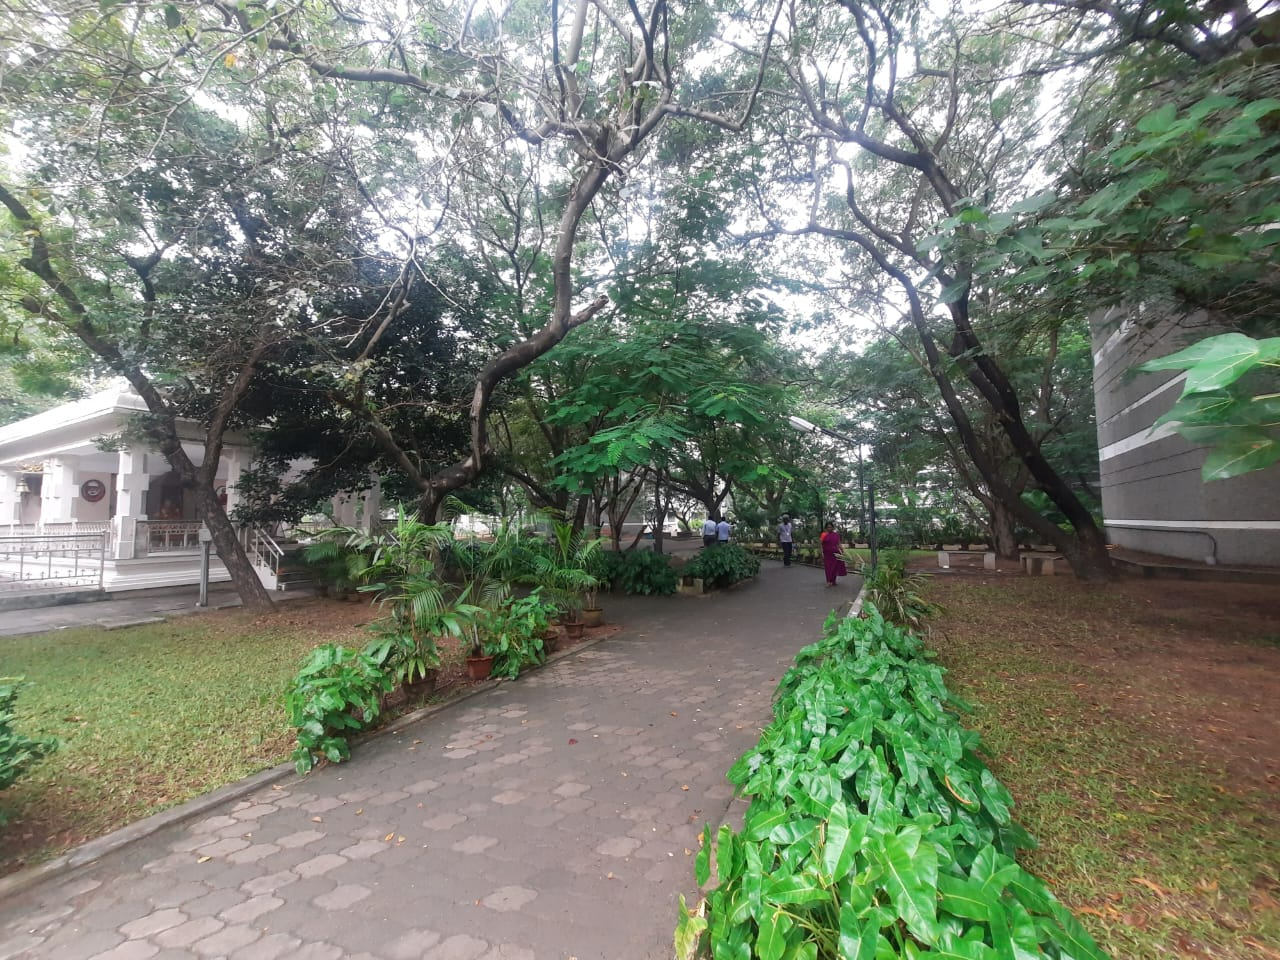

img2

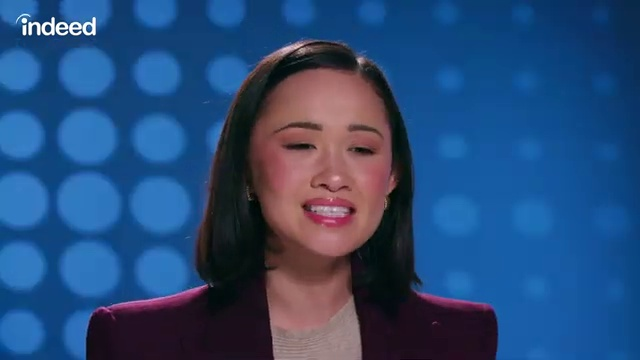

### Brief Summary of RGB Color Distribution and Histogram Comparison

**1. RGB Color Distribution Histogram:**
   - **What it is**: An RGB histogram represents the distribution of colors in an image by plotting the frequency of pixel intensities for each color channel (Red, Green, Blue) across a range from 0 to 255.
   - **Purpose**: It helps in understanding the color composition of an image. Each channel’s histogram shows how many pixels in the image have a particular intensity value.

**2. How Histograms are Calculated:**
   - The image is split into its three color channels: Red, Green, and Blue.
   - For each channel, the `cv2.calcHist()` function counts the number of pixels that have each possible intensity (from 0 to 255).
   - The resulting data is a histogram, which is then normalized to ensure consistent comparison across different images.

**3. Histogram Visualization:**
   - The histograms for each color channel are plotted using Matplotlib, showing the distribution of pixel intensities across the image. Peaks in the histogram represent high frequencies of certain intensity values.

**4. Comparing Histograms:**
   - **Why Compare**: To determine how similar or different two images are in terms of their color distributions.
   - **How**: The `cv2.compareHist()` function compares the histograms of two images using a specific method, such as correlation. This method calculates a similarity score:
     - A score of `1` indicates identical histograms (perfect match).
     - A score closer to `0` or negative indicates less similarity.

**5. Practical Application:**
   - **Detecting Scene Changes**: In videos, significant changes in color distribution between consecutive frames can indicate a scene change. By comparing histograms of consecutive frames, you can automatically detect these changes.

This approach is useful in various image processing tasks, such as object recognition, image segmentation, and video analysis, where understanding and comparing color distributions is crucial.

The `cv2.compareHist()` function in OpenCV compares two histograms and returns a measure of similarity between them. The function can use several comparison methods, but the most common is the correlation method.

### **Mathematical Calculation Behind `compareHist()`**

#### **1. Correlation Method (cv2.HISTCMP_CORREL):**

The correlation method measures the linear correlation between two histograms. The correlation value ranges from -1 to 1:
- **1** indicates perfect positive correlation (the histograms are identical).
- **0** indicates no correlation (the histograms are completely unrelated).
- **-1** indicates perfect negative correlation (one histogram is the negative of the other).

The correlation \( \text{C}(H_1, H_2) \) between two histograms \( H_1 \) and \( H_2 \) is calculated as:

\[
\text{C}(H_1, H_2) = \frac{\sum_{i=1}^{N} \left( H_1(i) - \overline{H_1} \right) \left( H_2(i) - \overline{H_2} \right)}{\sqrt{\sum_{i=1}^{N} \left( H_1(i) - \overline{H_1} \right)^2 \sum_{i=1}^{N} \left( H_2(i) - \overline{H_2} \right)^2}}
\]

Where:
- \( H_1(i) \) and \( H_2(i) \) are the values of the histograms at bin \( i \).
- \( \overline{H_1} \) and \( \overline{H_2} \) are the mean values of the histograms \( H_1 \) and \( H_2 \).
- \( N \) is the number of bins in the histogram.

**Steps in the Correlation Method:**
1. **Mean Calculation**:
   - Compute the mean value for each histogram:
     \[
     \overline{H_1} = \frac{1}{N} \sum_{i=1}^{N} H_1(i), \quad \overline{H_2} = \frac{1}{N} \sum_{i=1}^{N} H_2(i)
     \]
   
2. **Numerator Calculation**:
   - Compute the covariance of the histograms:
     \[
     \text{Numerator} = \sum_{i=1}^{N} \left( H_1(i) - \overline{H_1} \right) \left( H_2(i) - \overline{H_2} \right)
     \]

3. **Denominator Calculation**:
   - Compute the standard deviations of the histograms:
     \[
     \text{Denominator} = \sqrt{\sum_{i=1}^{N} \left( H_1(i) - \overline{H_1} \right)^2 \sum_{i=1}^{N} \left( H_2(i) - \overline{H_2} \right)^2}
     \]

4. **Correlation**:
   - Divide the numerator by the denominator to get the correlation coefficient.

#### **2. Other Comparison Methods:**
While the correlation method is commonly used, `compareHist()` supports other methods as well:

- **Chi-Square (cv2.HISTCMP_CHISQR)**:
  \[
  \chi^2(H_1, H_2) = \sum_{i=1}^{N} \frac{\left( H_1(i) - H_2(i) \right)^2}{H_1(i) + H_2(i)}
  \]
  - Measures the distance between two histograms, penalizing large differences.

- **Intersection (cv2.HISTCMP_INTERSECT)**:
  \[
  \text{Intersection}(H_1, H_2) = \sum_{i=1}^{N} \min(H_1(i), H_2(i))
  \]
  - Measures the overlap between two histograms.

- **Bhattacharyya Distance (cv2.HISTCMP_BHATTACHARYYA)**:
  \[
  D_B(H_1, H_2) = -\ln \left( \sum_{i=1}^{N} \sqrt{H_1(i) \cdot H_2(i)} \right)
  \]
  - Measures the similarity between two probability distributions.

Each method has its specific use cases, but the correlation method is particularly useful for detecting how similarly two images are colored or detecting scene changes in video frames.

References:
1. [https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html]
2. [https://openai.com/index/hello-gpt-4o/]
3. [https://stackoverflow.com/questions/6499491/comparing-two-histograms]